In [1]:
import pandas as pd
import numpy as np
from plotutils import *
np.seterr(all='raise')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

# logit

In [2]:
logdir='../IPG/test/log'; date='04_23_2021'; solver='naive'; loss='logit'; lam_shrink=[0.1, 0.01]; percent=[0.1, 0.2];

In [3]:
algo_df_dict_naive_adaptive = get_all_adaptive(logdir, date, loss, lam_shrink, percent, ts=[1e-12])
ppf = PerformanceProfile(algo_df_dict_naive_adaptive)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
print("=================")
naive_adaptive_best = 'naive-1e-12-none-inf'
print('Best params:', naive_adaptive_best)

naive-1e-12-none-inf
 44/44 instances terminate with status:  0
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 33 instances are kept.
Best params: naive-1e-12-none-inf


In [4]:
algo_df_dict_naive_const = get_all_naive(logdir, date, loss, lam_shrink, percent, safeguard='const', ts=[1e-12])
ppf = PerformanceProfile(algo_df_dict_naive_const)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', show_num=True, options={'ratio_max':4}, plot=False)
print("=================")
naive_const_best = 'naive-1e-12-const-1000.0'
print('Best params:', naive_const_best)

naive-1e-12-const-1000.0
 44/44 instances terminate with status:  0
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 33 instances are kept.
Best params: naive-1e-12-const-1000.0


In [5]:
algo_df_dict_naive_laststep = get_all_naive(logdir, date, loss, lam_shrink, percent, 
                                            safeguard='laststep',safeguard_consts=[1e-1, 1.0, 10.0, 1e3],ts=[1e-12])
ppf = PerformanceProfile(algo_df_dict_naive_laststep)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', plot=False,show_num=True)
print("=================")
naive_laststep_best = get_best(pools)
print('Best params:', naive_laststep_best)

naive-1e-12-laststep-0.1
 44/44 instances terminate with status:  0
naive-1e-12-laststep-1.0
 44/44 instances terminate with status:  0
naive-1e-12-laststep-10.0
 44/44 instances terminate with status:  0
naive-1e-12-laststep-1000.0
 44/44 instances terminate with status:  0
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 37 instances are kept.
Best params: naive-1e-12-laststep-10.0


In [6]:
algo_df_dict_naive_schimdt = get_all_naive(logdir, date, loss, lam_shrink, percent, safeguard='schimdt', 
                                           safeguard_consts=[1e0, 1e3, 1e5, 1e11], ts=[1e-12])
ppf = PerformanceProfile(algo_df_dict_naive_schimdt)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', plot=False,show_num=True, options={'ratio_max':4})
print("=================")
naive_schimdt_best = get_best(pools)
print('Best params:', naive_schimdt_best)

naive-1e-12-schimdt-1.0
 40/44 instances terminate with status:  0
  4/44 instances terminate with status:  2
naive-1e-12-schimdt-1000.0
 44/44 instances terminate with status:  0
naive-1e-12-schimdt-100000.0
 44/44 instances terminate with status:  0
naive-1e-12-schimdt-100000000000.0
 44/44 instances terminate with status:  0
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 36 instances are kept.
Best params: naive-1e-12-schimdt-100000.0


In [7]:
algo_df_dict_schimdt = get_all_schimdt(logdir, date, loss, lam_shrink, percent, schimdt_consts=[1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e11])
ppf = PerformanceProfile(algo_df_dict_schimdt)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='time', plot=False,show_num=True, options={'ratio_max':4})
print("=================")
schimdt_best = get_best(pools)
print('Best params:', schimdt_best)

schimdt-none-0.1
 37/44 instances terminate with status:  0
  7/44 instances terminate with status:  2
schimdt-none-1.0
 41/44 instances terminate with status:  0
  3/44 instances terminate with status:  2
schimdt-none-10.0
 43/44 instances terminate with status:  0
  1/44 instances terminate with status:  2
schimdt-none-100.0
 44/44 instances terminate with status:  0
schimdt-none-1000.0
 44/44 instances terminate with status:  0
schimdt-none-10000.0
 44/44 instances terminate with status:  0
schimdt-none-100000.0
 44/44 instances terminate with status:  0
schimdt-none-1000000.0
 44/44 instances terminate with status:  0
schimdt-none-100000000000.0
 40/44 instances terminate with status:  0
  3/44 instances terminate with status:  1
  1/44 instances terminate with status:  2
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 38 instances are kept.
Best params: schimdt-none-10000.0


In [8]:
pd.merge(algo_df_dict_schimdt['schimdt-none-10000.0'][['datasetid','subgrad_iters','time']], 
         algo_df_dict_naive_adaptive['naive-1e-12-none-inf'][['datasetid','subgrad_iters','time']], 
         on='datasetid', suffixes={"_SC", "_MINE"}).head(20)

,datasetid,subgrad_iters_SC,time_SC,subgrad_iters_MINE,time_MINE
0,a9a_0.1_0.1,1617,6.922988,103130,19.990296
1,australian_0.1_0.1,15,0.016314,29,0.005830
2,breast_cancer_0.1_0.1,99,0.154351,7627,1.027380
3,german_numer_0.1_0.1,69,0.131631,508,0.285518
4,ijcnn1_0.1_0.1,12487,15.741635,79510,10.165502
5,ionosphere_0.1_0.1,149,0.224556,3547,0.797920
6,mushrooms_0.1_0.1,4579,3.048908,134327,20.041394
7,sonar_0.1_0.1,513,0.490147,1647,1.210379
8,splice_0.1_0.1,18090,4.006784,1380,0.229349
9,svmguide3_0.1_0.1,124,0.157440,42923,4.544519


In [9]:
# final = {};
# final['schimdt-none-1000.0'] = algo_df_dict_schimdt['schimdt-none-1000.0']
# final['schimdt-none-100000.0'] = algo_df_dict_schimdt['schimdt-none-100000.0']
# final[naive_adaptive_best] = algo_df_dict_naive_adaptive[naive_adaptive_best]
# ppf = PerformanceProfile(final)
# ppf.get_subset_by_time(threshold=1, remove_failed=True)
# _ = ppf.plot(column='subgrad_iters',show_num=True, options={'ratio_max':10})

In [10]:
# algo_df_dict_naive_adaptive['naive-1e-12-none-inf'][['datasetid','subgrad_iters','time']]

In [11]:
# final = {};
# final[naive_adaptive_best] = algo_df_dict_naive_adaptive[naive_adaptive_best]
# final[naive_schimdt_best] = algo_df_dict_naive_schimdt[naive_schimdt_best]
# ppf = PerformanceProfile(final)
# ppf.get_subset_by_time(threshold=1, remove_failed=True)
# _ = ppf.plot(column='subgrad_iters',show_num=True, options={'ratio_max':10})

## no safeguard

All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 34 instances are kept.


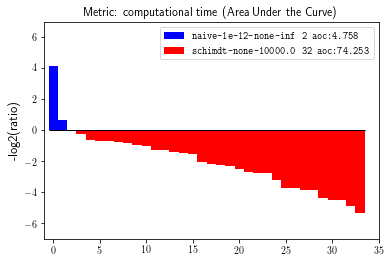

In [9]:
final = {}; target = naive_adaptive_best; df= algo_df_dict_naive_adaptive
final[target] = df[target]
final[schimdt_best] = algo_df_dict_schimdt[schimdt_best]
# schimdt_cheat = 'schimdt-none-1000.0'
# final[schimdt_cheat] = algo_df_dict_schimdt[schimdt_cheat]
ppf = PerformanceProfile(final)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
_ = ppf.plot(column='time',show_num=True, options={'ratio_max':7})

All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 36 instances are kept.
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 33 instances are kept.
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 33 instances are kept.
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 33 instances are kept.
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 34 instances are kept.
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 34 instances are kept.
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 35 instances are kept.
All algorithms failed in 0 instances
Metrics for failed

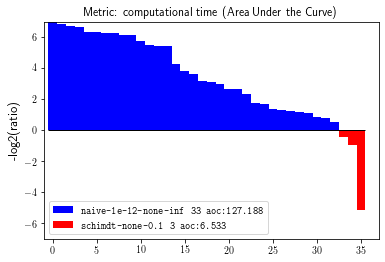

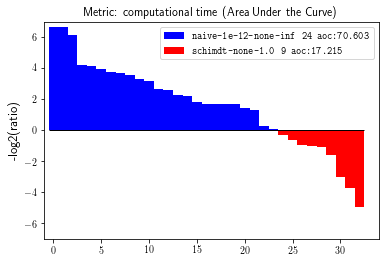

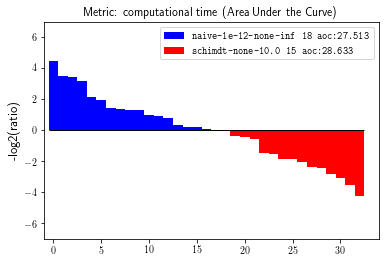

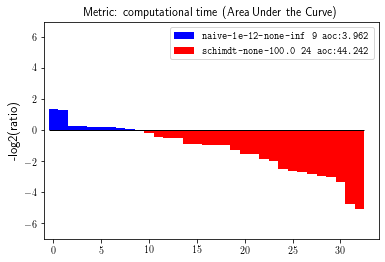

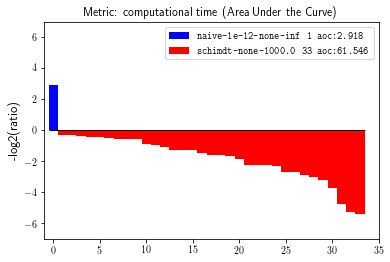

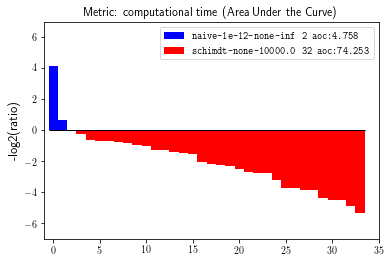

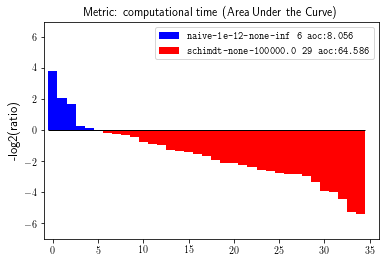

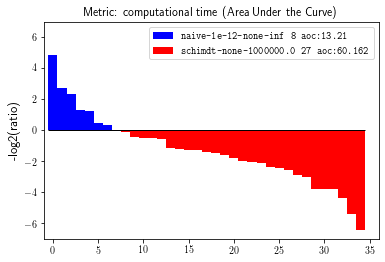

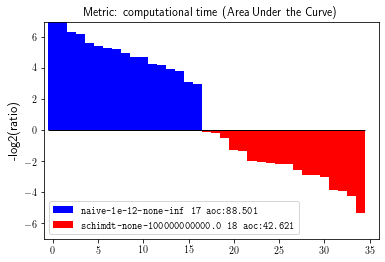

In [10]:
for c in [1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e11]:
    final = {}; target = naive_adaptive_best; df= algo_df_dict_naive_adaptive
    final[target] = df[target]
    schimdt_cheat = f'schimdt-none-{c}'
    final[schimdt_cheat] = algo_df_dict_schimdt[schimdt_cheat]
    ppf = PerformanceProfile(final)
    ppf.get_subset_by_time(threshold=1, remove_failed=True)
    _ = ppf.plot(column='time',show_num=True, options={'ratio_max':7})

## const safeguard

All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 35 instabces are kept.


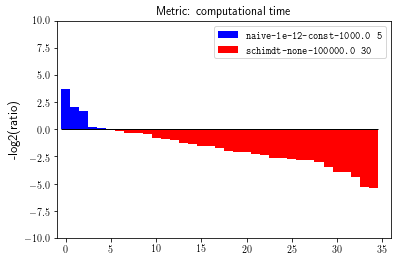

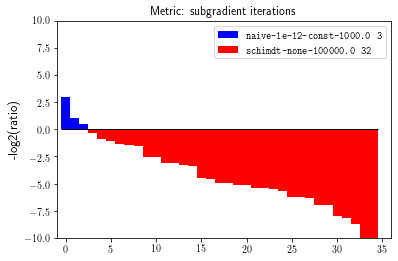

In [70]:
final = {}; target = naive_const_best; df= algo_df_dict_naive_const
final[target] = df[target]
final[schimdt_best] = algo_df_dict_schimdt[schimdt_best]
ppf = PerformanceProfile(final)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
_ = ppf.plot(column='time',show_num=True, options={'ratio_max':10})
_ = ppf.plot(column='subgrad_iters',show_num=True, options={'ratio_max':10})

# laststep safeguard

All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 35 instabces are kept.


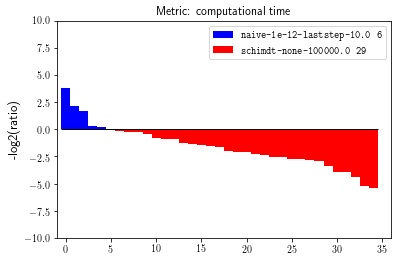

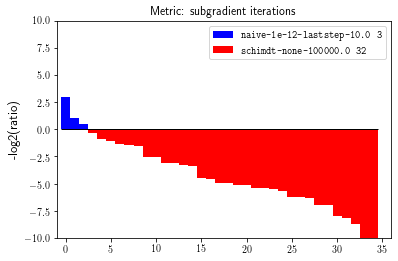

In [12]:
final = {}; target = naive_laststep_best; df= algo_df_dict_naive_laststep
final[target] = df[target]
final[schimdt_best] = algo_df_dict_schimdt[schimdt_best]
ppf = PerformanceProfile(final)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
_ = ppf.plot(column='time',show_num=True, options={'ratio_max':10})
_ = ppf.plot(column='subgrad_iters',show_num=True, options={'ratio_max':10})

# Schimdt safeguard

All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 35 instabces are kept.


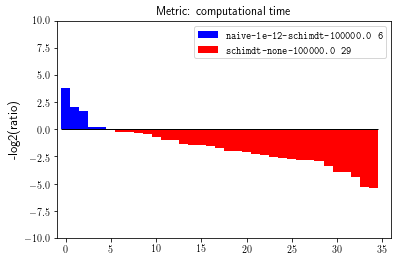

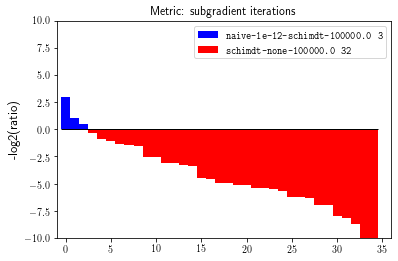

In [13]:
final = {}; target = naive_schimdt_best; df= algo_df_dict_naive_schimdt
final[target] = df[target]
final[schimdt_best] = algo_df_dict_schimdt[schimdt_best]
ppf = PerformanceProfile(final)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
_ = ppf.plot(column='time',show_num=True, options={'ratio_max':10})
_ = ppf.plot(column='subgrad_iters',show_num=True, options={'ratio_max':10})

# ls

In [2]:
logdir='../IPG/test/log'; date='04_23_2021'; solver='naive'; loss='ls'; lam_shrink=[0.1, 0.01]; percent=[0.1, 0.2];

In [3]:
# def create_paths(logdir='../IPG/test/log', date='04_18_2021', solver='naive', loss='logit', lam_shrink=[0.1, 0.01], percent=[0.1, 0.2], excludes=None, *argv):
#     list_all_npy_path =[]
#     for lam in lam_shrink:
#         for per in percent:
#             minimal_dir = f'{logdir}/{date}/{solver}/{loss}/{lam}_{per}'
#             for arg in argv:
#                 minimal_dir += f'_{arg}'
#             datasets = glob.glob(f'{minimal_dir}/*.npy')
#             datasets.sort()
#             datasets_rmed = datasets.copy()
#             if excludes is not None:
#                 for e in excludes:
#                     for p in datasets:
#                         datasetname = p.split("/")[-1].split("_")[0]
#                         if datasetname == e:
#                             datasets_rmed.remove(p)
#             list_all_npy_path += datasets_rmed
#     return list_all_npy_path
# def get_all_adaptive(logdir, date, loss, lam_shrink, percent, ts=[1e-12], excludes=None):
#     algo_df_dict = {}
#     solver = 'naive'
#     for t in ts:
#         algorithm = f'{solver}-{t}-none-inf'
#         print(f'{algorithm}')
#         paths = create_paths(logdir, date, solver, loss, lam_shrink, percent, excludes, t, 'none', 'inf')
#         print("===")
#         if paths == []:
#             print(' empty')
#             df = None
#         else:
#             df = load_df_from_paths(paths)
#         algo_df_dict[algorithm] = df
#     return algo_df_dict

In [5]:
algo_df_dict_naive_adaptive = get_all_adaptive(logdir, date, loss, lam_shrink, percent, ts=[1e-12], excludes=['YearPredictionMSD'])
ppf = PerformanceProfile(algo_df_dict_naive_adaptive)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='subgrad_iters', show_num=True, options={'ratio_max':4}, plot=False)
print("=================")
naive_adaptive_best = 'naive-1e-12-none-inf'
print('Best params:', naive_adaptive_best)

naive-1e-12-none-inf
 30/32 instances terminate with status:  0
  2/32 instances terminate with status:  2
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 13 instances are kept.
Best params: naive-1e-12-none-inf


In [7]:
algo_df_dict_naive_const = get_all_naive(logdir, date, loss, lam_shrink, percent, safeguard='const', ts=[1e-12], excludes=['YearPredictionMSD'])
ppf = PerformanceProfile(algo_df_dict_naive_const)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='subgrad_iters', show_num=True, options={'ratio_max':4}, plot=False)
print("=================")
naive_const_best = 'naive-1e-12-const-1000.0'
print('Best params:', naive_const_best)

naive-1e-12-const-1000.0
 30/32 instances terminate with status:  0
  2/32 instances terminate with status:  2
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 13 instances are kept.
Best params: naive-1e-12-const-1000.0


In [8]:
algo_df_dict_naive_laststep = get_all_naive(logdir, date, loss, lam_shrink, percent, 
                                            safeguard='laststep', safeguard_consts=[1e-1, 1.0, 10.0, 1e3],ts=[1e-12], excludes=['YearPredictionMSD'])
ppf = PerformanceProfile(algo_df_dict_naive_laststep)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='subgrad_iters', plot=False,show_num=True, options={'ratio_max':4})
print("=================")
naive_laststep_best = get_best(pools)
print('Best params:', naive_laststep_best)

naive-1e-12-laststep-0.1
 26/32 instances terminate with status:  0
  4/32 instances terminate with status: -2
  2/32 instances terminate with status:  2
naive-1e-12-laststep-1.0
 30/32 instances terminate with status:  0
  2/32 instances terminate with status:  2
naive-1e-12-laststep-10.0
 30/32 instances terminate with status:  0
  2/32 instances terminate with status:  2
naive-1e-12-laststep-1000.0
 30/32 instances terminate with status:  0
  2/32 instances terminate with status:  2
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 19 instances are kept.
Best params: naive-1e-12-laststep-1000.0


In [11]:
# algo_df_dict_naive_laststep['naive-1e-12-laststep-0.1']

In [14]:
algo_df_dict_naive_schimdt = get_all_naive(logdir, date, loss, lam_shrink, percent, safeguard='schimdt', 
                                           safeguard_consts=[1e0, 1e3, 1e5, 1e11], ts=[1e-12], excludes=['YearPredictionMSD'])
ppf = PerformanceProfile(algo_df_dict_naive_schimdt)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='subgrad_iters', plot=False,show_num=True, options={'ratio_max':4})
print("=================")
naive_schimdt_best = get_best(pools)
print('Best params:', naive_schimdt_best)

naive-1e-12-schimdt-1.0
 26/32 instances terminate with status:  0
  4/32 instances terminate with status: -2
  2/32 instances terminate with status:  2
naive-1e-12-schimdt-1000.0
 28/32 instances terminate with status:  0
  2/32 instances terminate with status: -2
  2/32 instances terminate with status:  2
naive-1e-12-schimdt-100000.0
 28/32 instances terminate with status:  0
  2/32 instances terminate with status: -2
  2/32 instances terminate with status:  2
naive-1e-12-schimdt-100000000000.0
 30/32 instances terminate with status:  0
  2/32 instances terminate with status:  2
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 16 instances are kept.
Best params: naive-1e-12-schimdt-100000000000.0


In [15]:
algo_df_dict_schimdt = get_all_schimdt(logdir, date, loss, lam_shrink, percent, schimdt_consts=[1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e11], 
                                       excludes=['YearPredictionMSD'])
ppf = PerformanceProfile(algo_df_dict_schimdt)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
pools = ppf.plot(column='subgrad_iters', plot=False,show_num=True, options={'ratio_max':4})
print("=================")
schimdt_best = get_best(pools)
print('Best params:', schimdt_best)
# schimdt_best = 'schimdt-none-1.0'

schimdt-none-0.1
 26/32 instances terminate with status:  0
  4/32 instances terminate with status: -2
  2/32 instances terminate with status:  2
schimdt-none-1.0
 26/32 instances terminate with status:  0
  4/32 instances terminate with status: -2
  2/32 instances terminate with status:  2
schimdt-none-10.0
 26/32 instances terminate with status:  0
  4/32 instances terminate with status: -2
  2/32 instances terminate with status:  2
schimdt-none-100.0
 26/32 instances terminate with status:  0
  4/32 instances terminate with status: -2
  2/32 instances terminate with status:  2
schimdt-none-1000.0
 30/32 instances terminate with status:  0
  2/32 instances terminate with status: -2
schimdt-none-10000.0
 30/32 instances terminate with status:  0
  2/32 instances terminate with status: -2
schimdt-none-100000.0
 30/32 instances terminate with status:  0
  2/32 instances terminate with status: -2
schimdt-none-1000000.0
 30/32 instances terminate with status:  0
  2/32 instances terminate

## No safeguard

All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 15 instances are kept.


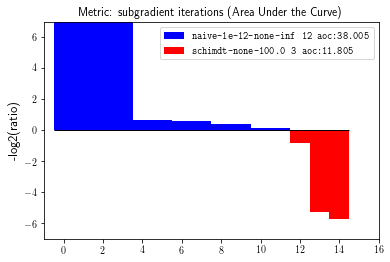

In [16]:
final = {}; target = naive_adaptive_best; df= algo_df_dict_naive_adaptive
final[target] = df[target]
final[schimdt_best] = algo_df_dict_schimdt[schimdt_best]
# schimdt_cheat = 'schimdt-none-1000.0'
# final[schimdt_cheat] = algo_df_dict_schimdt[schimdt_cheat]
ppf = PerformanceProfile(final)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
_ = ppf.plot(column='subgrad_iters',show_num=True, options={'ratio_max':7})

In [22]:
# -np.log2((ppf.algo_df_dic['naive-1e-12-none-inf']['subgrad_iters'] / ppf.algo_df_dic['schimdt-none-100.0']['subgrad_iters']).to_numpy() + 1e-16)
# ppf.bars_pos, ppf.bars_neg

All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 20 instances are kept.
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 15 instances are kept.
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 15 instances are kept.
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 15 instances are kept.
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 15 instances are kept.
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 17 instances are kept.
All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 18 instances are kept.
All algorithms failed in 0 instances
Metrics for failed

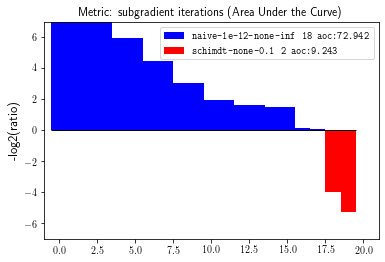

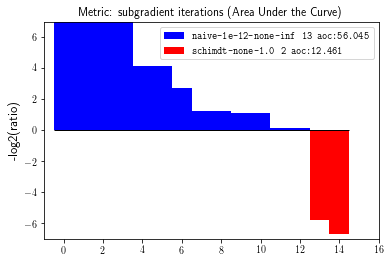

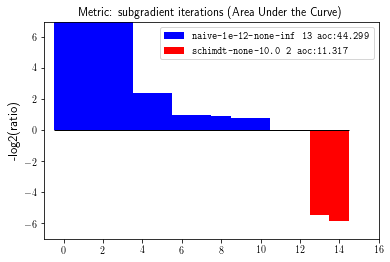

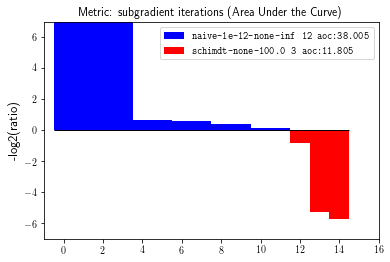

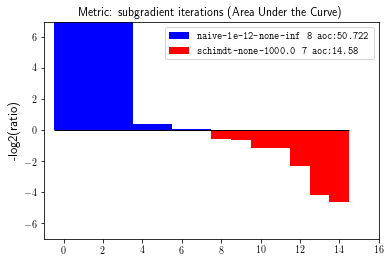

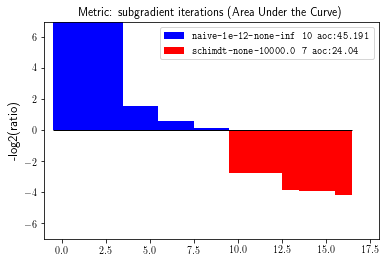

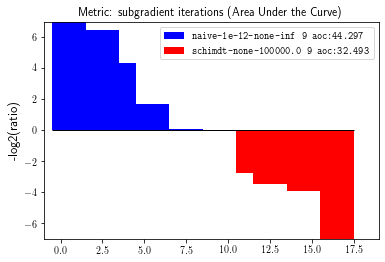

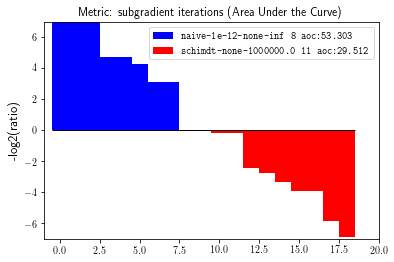

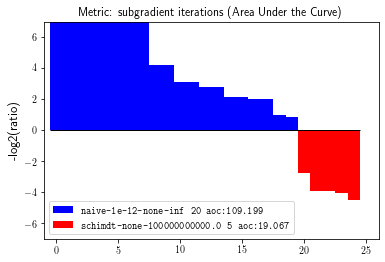

In [23]:
for c in [1e-1, 1e0, 1e1, 1e2, 1e3, 1e4, 1e5, 1e6, 1e11]:
    final = {}; target = naive_adaptive_best; df= algo_df_dict_naive_adaptive
    final[target] = df[target]
    schimdt_cheat = f'schimdt-none-{c}'
    final[schimdt_cheat] = algo_df_dict_schimdt[schimdt_cheat]
    ppf = PerformanceProfile(final)
    ppf.get_subset_by_time(threshold=1, remove_failed=True)
    _ = ppf.plot(column='subgrad_iters',show_num=True, options={'ratio_max':7})

# const safeguard

All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 15 instances are kept.


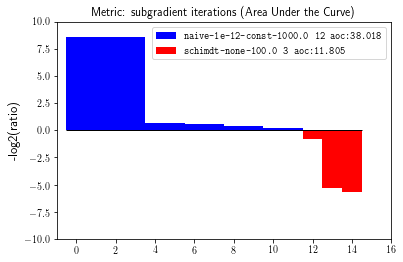

In [24]:
final = {}; target = naive_const_best; df= algo_df_dict_naive_const
final[target] = df[target]
final[schimdt_best] = algo_df_dict_schimdt[schimdt_best]
# schimdt_cheat = 'schimdt-none-1000.0'
# final[schimdt_cheat] = algo_df_dict_schimdt[schimdt_cheat]
ppf = PerformanceProfile(final)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
# _ = ppf.plot(column='time',show_num=True, options={'ratio_max':10})
_ = ppf.plot(column='subgrad_iters',show_num=True, options={'ratio_max':10})

# laststep safeguard

All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 15 instances are kept.


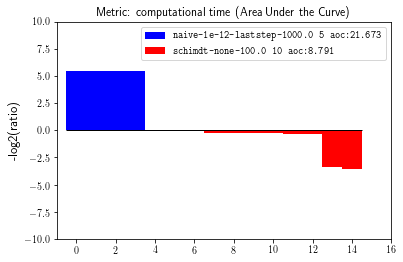

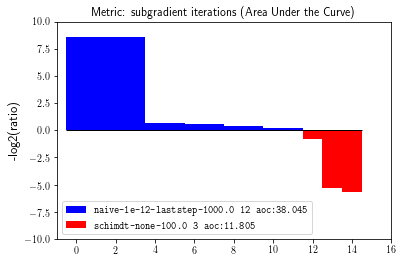

In [25]:
final = {}; target = naive_laststep_best; df= algo_df_dict_naive_laststep
final[target] = df[target]
final[schimdt_best] = algo_df_dict_schimdt[schimdt_best]
ppf = PerformanceProfile(final)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
_ = ppf.plot(column='time',show_num=True, options={'ratio_max':10})
_ = ppf.plot(column='subgrad_iters',show_num=True, options={'ratio_max':10})

# Schimdt safeguard

All algorithms failed in 0 instances
Metrics for failed instances are overwritten with np.inf
After subsetting, 15 instances are kept.


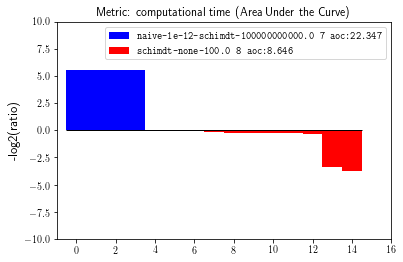

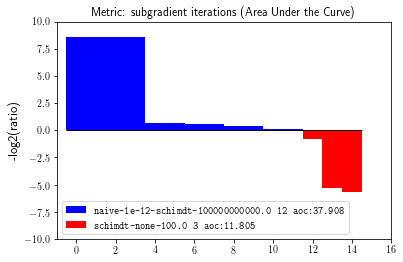

In [26]:
final = {}; target = naive_schimdt_best; df= algo_df_dict_naive_schimdt
final[target] = df[target]
final[schimdt_best] = algo_df_dict_schimdt[schimdt_best]
ppf = PerformanceProfile(final)
ppf.get_subset_by_time(threshold=1, remove_failed=True)
_ = ppf.plot(column='time',show_num=True, options={'ratio_max':10})
_ = ppf.plot(column='subgrad_iters',show_num=True, options={'ratio_max':10})

In [27]:
# sanity check
# ppf.algo_df_dic[target]['subgrad_iters'].to_numpy() - ppf.algo_df_dic[schimdt_best]['subgrad_iters'].to_numpy()